*Kết nối với google Drive để connect với dataset của nhóm*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Sử dụng thư viện pandas để làm việc với dữ liệu có cấu trúc và đọc dữ liệu từ tệp CSV, sau đó được lưu vào dataframe có tên là **'data'**. Đọc 10 dòng đầu tiên của dataframe được hiển thị bằng phương thức head(10)*

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/PTDLWPT/car_data_analyst_with_python.csv')
data.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


*Phương thức **describe()** trong pandas được sử dụng để tạo ra một tóm tắt thống kê của các biến số trong dataframe. Kết quả trả về bao gồm các thống kê cơ bản như **số lượng mẫu, giá trị trung bình, độ lệch chuẩn, giá trị min, các phần vị (25%, 50%, 75%), và giá trị max** của mỗi biến số số học. Bằng cách này, bạn có thể nhanh chóng hiểu được phân bố và đặc điểm của dữ liệu mà mình đang làm việc.*

In [ ]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1103.000000,1103.000000,1103.000000,1103.000000
mean,495.947416,40.058930,72154.125113,0.400725
std,287.585314,10.637193,34059.436129,0.490268
min,1.000000,18.000000,15000.000000,0.000000
25%,249.000000,32.000000,45500.000000,0.000000
50%,497.000000,40.000000,72000.000000,0.000000
75%,741.500000,48.000000,89750.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


*kiểm tra dữ liệu trùng lặp trong dataframe **`data`**. Đầu tiên, sử dụng phương thức **`duplicated()`** để tạo một dataframe con chứa các hàng bị trùng lặp trong **`data`**. Sau đó, kiểm tra số lượng dòng trong dataframe con này. Nếu không có dòng nào bị trùng lặp, mã sẽ in ra thông báo "**Không có dữ liệu trùng lặp trong dataset.**". Ngược lại, nếu có dòng bị trùng lặp, mã sẽ in ra **số lượng dòng đó và hiển thị chúng.**

In [ ]:
duplicate_rows = data[data.duplicated()]
if duplicate_rows.shape[0] == 0:
    print("Không có dữ liệu trùng lặp trong dataset.")
else:
    print("Có {} dòng dữ liệu trùng lặp trong dataset:".format(duplicate_rows.shape[0]))
    print(duplicate_rows)

Có 103 dòng dữ liệu trùng lặp trong dataset:
      User ID  Gender  Age  AnnualSalary  Purchased
1000      821    Male   54         25500          1
1001      294  Female   41         61500          0
1002      597  Female   31        117500          0
1003      567    Male   24         58000          0
1004       20    Male   40        107000          1
...       ...     ...  ...           ...        ...
1098        8  Female   54         26000          1
1099      129    Male   47        105000          1
1100      328    Male   37         77000          0
1101      161    Male   42         53500          0
1102      368    Male   36         89500          0

[103 rows x 5 columns]


 *Xử lý các giá trị trùng lặp trong dataframe **`data`** bằng cách sử dụng phương thức **`drop_duplicates()`**. Và đếm số hàng trong dataframe sau khi xử lý và in ra kết quả.*

In [ ]:
data.drop_duplicates(inplace=True)
num_rows = data.shape[0]
print("Số rows sau khi xử lý các giá trị trùng lặp:", num_rows)

Số rows sau khi xử lý các giá trị trùng lặp: 1000


*Loại bỏ cột **"User ID"** khỏi dataframe bằng cách xóa colums đó. Loại bỏ thông tin không cần thiết và tối ưu hóa dữ liệu để phù hợp với mục đích phân tích hoặc xử lý tiếp theo.*

In [ ]:
data.drop(columns=['User ID'], inplace=True)

*Hiển thị 10 hàng đầu tiên trong dataframe sau khi đã loại bỏ cột **"User ID"**.*

In [ ]:
data.head(10)

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
5,Female,47,33500,1
6,Female,46,132500,1
7,Male,42,64000,0
8,Female,30,84500,0
9,Male,41,52000,0


*Sử dụng **Label Encoder** để chuyển đổi cột **"Gender"** từ dạng văn bản **("Male" và "Female") sang dạng số (0 và 1)**. Mục đích là để biến đổi dữ liệu dạng văn bản thành dữ liệu dạng số để có thể sử dụng cho các mô hình học máy. Điều này giúp cải thiện khả năng xử lý và hiệu suất của các mô hình.*

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender_Enc'] = label_encoder.fit_transform(data['Gender'])
print(data[['Gender', 'Gender_Enc']].head(10))

   Gender  Gender_Enc
0    Male           1
1    Male           1
2    Male           1
3    Male           1
4    Male           1
5  Female           0
6  Female           0
7    Male           1
8  Female           0
9    Male           1


*Hiển thị 10 hàng đầu tiên trong dataframe sau khi đã chuyển đổi Gender từ dạng văn bản sang dạng số*

In [ ]:
data.head(10)

,Gender,Age,AnnualSalary,Purchased,Gender_Enc
0,Male,35,20000,0,1
1,Male,40,43500,0,1
2,Male,49,74000,0,1
3,Male,40,107500,1,1
4,Male,25,79000,0,1
5,Female,47,33500,1,0
6,Female,46,132500,1,0
7,Male,42,64000,0,1
8,Female,30,84500,0,0
9,Male,41,52000,0,1


*Sau khi chuyển đổi cột "**Gender**" thành dạng số thông qua Label Encoder, không cần thiết phải giữ lại cột "**Gender**" dưới dạng văn bản nữa. Chúng ta giảm kích thước của dataframe và tinh gọn dữ liệu để làm cho việc xử lý và phân tích dễ dàng hơn.*

In [ ]:
data.drop(columns=['Gender'], inplace=True)
print(data.head(10))

   Age  AnnualSalary  Purchased  Gender_Enc
0   35         20000          0           1
1   40         43500          0           1
2   49         74000          0           1
3   40        107500          1           1
4   25         79000          0           1
5   47         33500          1           0
6   46        132500          1           0
7   42         64000          0           1
8   30         84500          0           0
9   41         52000          0           1


*Di chuyển cột "**Gender_Enc**" từ vị trí cũ lên vị trí **đầu tiên**. Giúp làm cho dữ liệu trở nên dễ đọc hơn. Giúp tăng cường tính rõ ràng và thuận tiện trong quá trình phân tích dữ liệu và xây dựng mô hình.*

In [ ]:
gender_column = data.pop('Gender_Enc')
data.insert(0, 'Gender_Enc', gender_column)
print(data.head())

   Gender_Enc  Age  AnnualSalary  Purchased
0           1   35         20000          0
1           1   40         43500          0
2           1   49         74000          0
3           1   40        107500          1
4           1   25         79000          0


*Xác định và loại bỏ các **outlier** từ dataframe bằng cách sử dụng phương pháp **Z-score**. Giúp tăng cường chất lượng của dữ liệu và cải thiện hiệu suất của các mô hình dự đoán hoặc phân loại được xây dựng trên dữ liệu*

In [ ]:
import numpy as np
# Tính Z-score cho mỗi dòng dữ liệu
z_scores = np.abs((data - data.mean())/data.std())
# Xác định các dòng dữ liệu chứa outlier
outlier_threshold = 3  # Ngưỡng Z-score cho outlier, thay đổi nếu cần
outliers = data[(z_scores > outlier_threshold).any(axis=1)]
# Loại bỏ outlier từ DataFrame
df = data[(z_scores <= outlier_threshold).all(axis=1)]
# In ra số lượng outlier và DataFrame sau khi loại bỏ outlier
print("Số lượng outlier:", outliers.shape[0])
print("DataFrame sau khi loại bỏ outlier:")
print(df.head())

Số lượng outlier: 0
DataFrame sau khi loại bỏ outlier:
   Gender_Enc  Age  AnnualSalary  Purchased
0           1   35         20000          0
1           1   40         43500          0
2           1   49         74000          0
3           1   40        107500          1
4           1   25         79000          0


*kiểm tra và đếm số lượng giá trị thiếu (**null**) trong từng cột của dataframe*

In [ ]:
data.isnull().sum()

Gender_Enc      0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

*Số lượng các giá trị duy nhất trong mỗi cột của DataFrame. Cung cấp thông tin về độ đa dạng của dữ liệu trong từng cột, giúp hiểu rõ hơn về phân phối và tính đa dạng của các thuộc tính trong tập dữ liệu. Điều này có thể hữu ích trong quá trình khám phá dữ liệu và chọn phương pháp phù hợp cho việc tiền xử lý dữ liệu và mô hình hóa.*

In [ ]:
data.nunique()

Gender_Enc        2
Age              46
AnnualSalary    247
Purchased         2
dtype: int64

*huyển kiểu dữ liệu của cột "**Purchased**" sang kiểu integer (**int64**) để đảm bảo rằng cột "**Purchased**" đã được chuyển đổi thành kiểu dữ liệu số để phù hợp với loại dữ liệu của dữ liệu mục tiêu trong quá trình mô hình hóa.*

In [ ]:
data['Purchased'] = data['Purchased'].astype('int64')
print(data['Purchased'].dtype)

int64


*   ***The Variable Types***
*   *kiểm tra tổng quan về dữ liệu và kiểm tra xem có các giá trị thiếu nào không, cũng như kiểm tra kiểu dữ liệu của các cột.*





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender_Enc    1000 non-null   int64
 1   Age           1000 non-null   int64
 2   AnnualSalary  1000 non-null   int64
 3   Purchased     1000 non-null   int64
dtypes: int64(4)
memory usage: 39.1 KB


# **TRỰC QUAN HÓA DỮ LIỆU**

# THE TARGET FEATURE

*Biểu đồ cột này thể hiện số lượng các trường hợp mua và không mua (đã được đánh giá bởi cột "Purchased") trong dữ liệu. **Màu đỏ** được sử dụng để đại diện cho trường hợp **không mua**, trong khi **màu xanh** da trời được sử dụng để đại diện cho trường hợp **mua**. Điều này giúp phân biệt dễ dàng giữa hai nhóm và làm cho biểu đồ trở nên dễ đọc hơn.*

<Axes: xlabel='Purchased'>

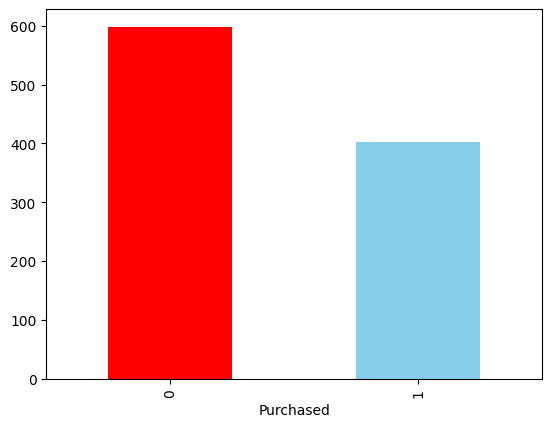

In [ ]:
data['Purchased'].value_counts().plot(kind='bar', color=['red', 'skyblue'])

***Gần 60% khách hàng trong tổng số khách hàng đưa ra quyết định không mua xe ô tô***

# **Age (Độ Tuổi)**

*Hiển thị giá trị tuổi **nhỏ nhất** và **lớn nhất** trong cột "Age" của dữ liệu. Điều này giúp định rõ phạm vi tuổi của khách hàng trong tập dữ liệu*

In [ ]:
min_age, max_age = data['Age'].min(), data['Age'].max()
print(min_age, max_age)

18 63


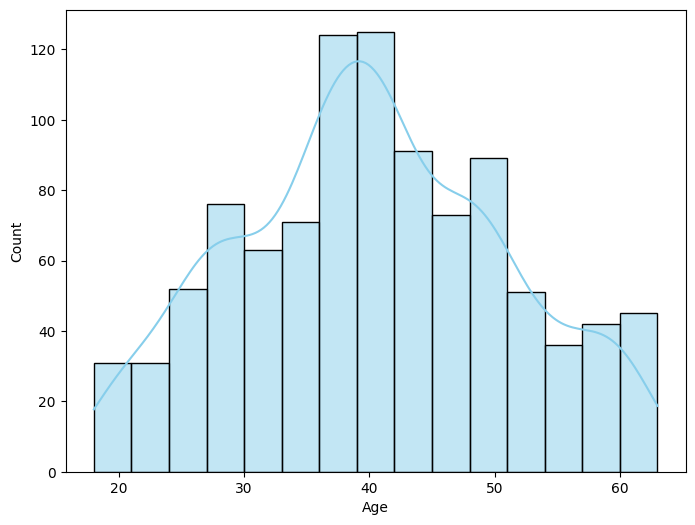

In [ ]:
# Biểu Đồ Phân Bố Độ Tuổi
import matplotlib.pyplot as plt
import seaborn as sns
color = 'skyblue'
fig = plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', kde=True, color=color)
plt.show()

***Độ tuổi của khách hàng nằm trong khoảng từ 18 đến 63 tuổi***

*Phân phối của dữ liệu tuổi trong tập dữ liệu.
Phân phối dữ liệu: Biểu đồ hộp giúp hiểu rõ phân phối của dữ liệu tuổi thông qua việc minh họa các phần vị phần tư (25%, 50%, 75%) và các giá trị ngoại lệ (nếu có).*

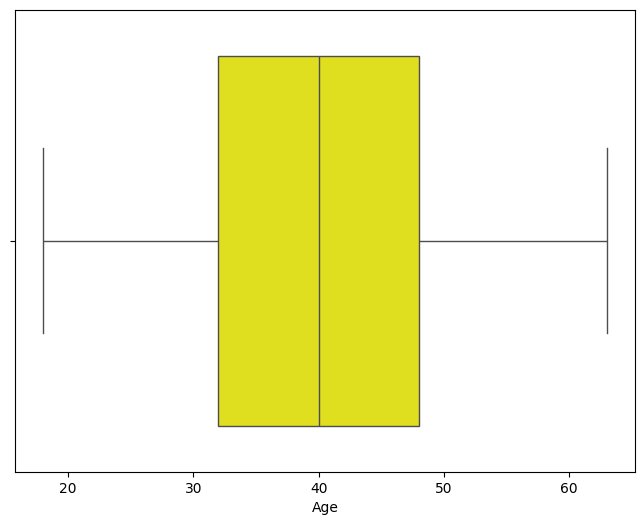

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'], color='yellow')
plt.show()

***Hơn 50% khách hàng tập trung vào độ tuổi từ 32 đến 48 tuổi***

# Annual Salary

Biểu đồ này hiển thị phân phối của mức thu nhập hàng năm của khách hàng trong tập dữ liệu. Các thành phần chính của biểu đồ bao gồm:
*   **Phân phối dữ liệu:** Biểu đồ histogram cung cấp cái nhìn tổng quan về phân phối của mức thu nhập hàng năm. Dữ liệu được chia thành các khoảng (bins), với số lượng quan sát trong mỗi khoảng được hiển thị trên trục y.
*   **Đường cong KDE (Kernel Density Estimate):** Đường cong KDE là một ước lượng của hàm mật độ xác suất của dữ liệu. Nó cho phép xác định hình dạng tổng quan của phân phối dữ liệu một cách trực quan.
*   **Mức thu nhập:** Trục x biểu thị các khoảng giá trị của mức thu nhập hàng năm. Các thanh dọc (bars) trên biểu đồ histogram biểu thị số lượng quan sát trong mỗi khoảng.




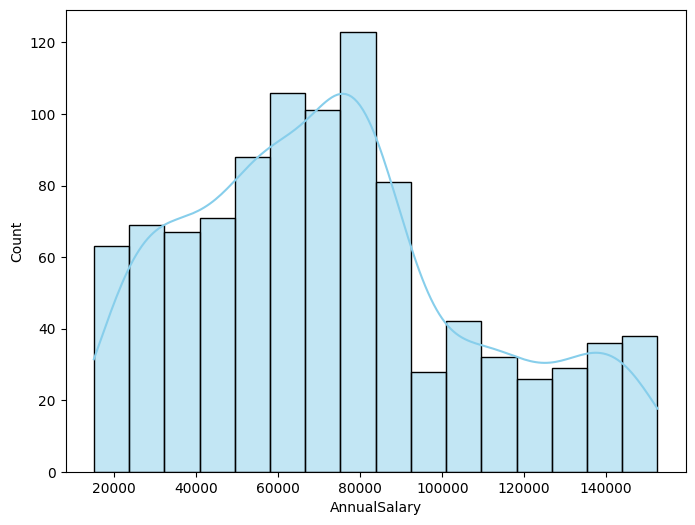

In [ ]:
# Biểu đồ thể hiện phân phối của mức thu nhập hàng năm của khách hàng
plt.figure(figsize=(8, 6))
sns.histplot(data['AnnualSalary'], kde=True, color='skyblue')
plt.show()

*Giá trị trung bình (mean), trung vị (median) và mode của cột 'AnnualSalary' trong DataFrame*

In [ ]:
# Giá trị trung bình, trung vị và giá trị Mode Thu nhập của KH
import statistics
print("Mean: {}, Median: {}, Mode: {}".format(np.mean(data['AnnualSalary']), np.median(data['AnnualSalary'].median()), statistics.mode(data['AnnualSalary'])))

Mean: 72689.0, Median: 72000.0, Mode: 81500


*Phân phối của mức lương hàng năm ('**AnnualSalary**') trong DataFrame 'data'. Đồng thời, đường kẻ màu đỏ (vertical line) tại giá trị **90000** được thêm vào để chỉ ra ngưỡng cắt của mức lương.*

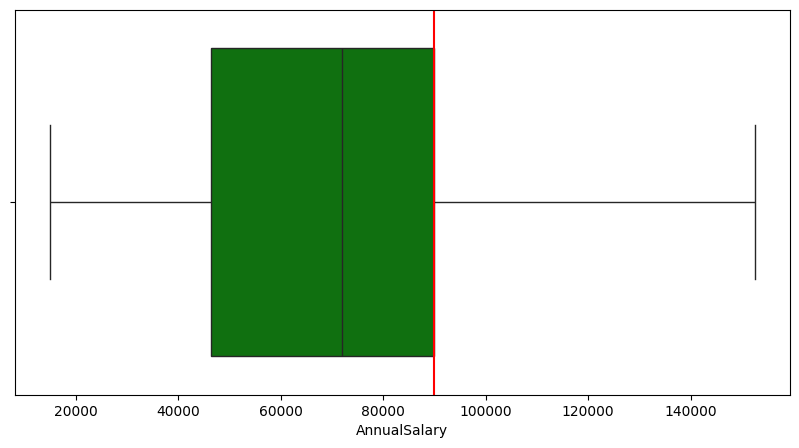

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x = data['AnnualSalary'],color='green')
plt.axvline(x = 90000, color = 'r')
plt.show()

In [ ]:
data[data['AnnualSalary'] >= 90000]['Purchased'].value_counts()/len(data[data['AnnualSalary'] >= 90000])

Purchased
1    0.84585
0    0.15415
Name: count, dtype: float64

***Hơn 84% những người có mức lương lớn hơn 90.000 đã mua xe ô tô***

# Categorical Features

*Biểu đồ barplot thể hiện mối liên hệ giữa biến "Gender_Enc" (giới tính) và biến mục tiêu "Purchased" (mua hàng). Mỗi cột biểu đồ biểu thị tỷ lệ mua hàng (1) và không mua hàng (0) trong mỗi nhóm giới tính. Cột màu xanh đại diện cho giới tính Female, trong khi cột màu đỏ đại diện cho giới tính Male.*

<ipython-input-58-6e3828392feb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender_Enc', y='Purchased', palette=palette)


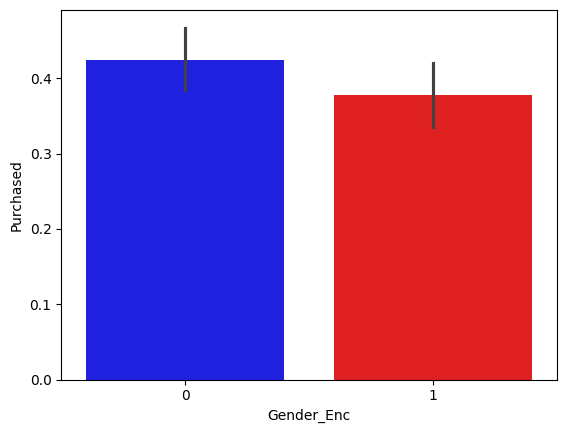

In [ ]:
#Biểu đồ thể hiện Số lượng Nam và Nữ (Female=0, Male=1)
palette = {'0': 'blue', '1': 'red'}
sns.barplot(data=data, x='Gender_Enc', y='Purchased', palette=palette)
plt.show()

*Tỷ lệ của giá trị "Purchased" trong nhóm có giới tính là Nam. Nó chia số lượng các trường hợp mua và không mua thành hai phần và sau đó chia cho tổng số lượng quan sát trong nhóm đó. Điều này cho biết tỷ lệ mua và không mua trong nhóm có giới tính là Nam giới.*

In [ ]:
data[data['Gender_Enc'] == 1]['Purchased'].value_counts() / len(data[data['Gender_Enc'] == 1])

Purchased
0    0.621901
1    0.378099
Name: count, dtype: float64

***62% nam giới quyết định mua xe ô tô và 37% còn lại quyết định không mua xe.***

*Tỷ lệ của giá trị "Purchased" trong nhóm có giới tính là Nữ. Nó chia số lượng các trường hợp mua và không mua thành hai phần và sau đó chia cho tổng số lượng quan sát trong nhóm đó. Điều này cho biết tỷ lệ mua và không mua trong nhóm có giới tính là Nữ giới.*

In [ ]:
data[data['Gender_Enc'] == 0]['Purchased'].value_counts() / len(data[data['Gender_Enc'] == 0])

Purchased
0    0.575581
1    0.424419
Name: count, dtype: float64

***57% nữ giới quyết định mua xe ô tô và 42% còn lại quyết định không mua xe . ***

*Tạo ra hai biểu đồ cạnh nhau, mỗi biểu đồ biểu diễn tỷ lệ mua và không mua xe của khách hàng có mức lương thấp hơn mức lương trung bình, dựa trên giới tính. *

- **Biểu đồ đầu tiên (bên trái)**thể hiện tỷ lệ mua và không mua của nam giới có mức lương dưới mức lương trung bình.
- **Biểu đồ thứ hai (bên phải)** thể hiện tỷ lệ mua và không mua của nữ giới có mức lương dưới mức lương trung bình.

*Để so sánh quyết định mua xe của khách hàng giữa nam và nữ có mức lương thấp hơn mức lương trung bình.*

In [ ]:
def average_salary_buyers(gender, operator):
    mean_salary = np.mean(data['AnnualSalary'])

    if operator == '<':
        avverage_salary_buyers_df = data[(data['AnnualSalary'] < mean_salary) & (data['Gender_Enc'] == gender)]
        return avverage_salary_buyers_df['Purchased'].value_counts() / len(avverage_salary_buyers_df)

    else:
        avverage_salary_buyers_df = data[(data['AnnualSalary'] > mean_salary) & (data['Gender_Enc'] == gender)]
        return avverage_salary_buyers_df['Purchased'].value_counts() / len(avverage_salary_buyers_df)

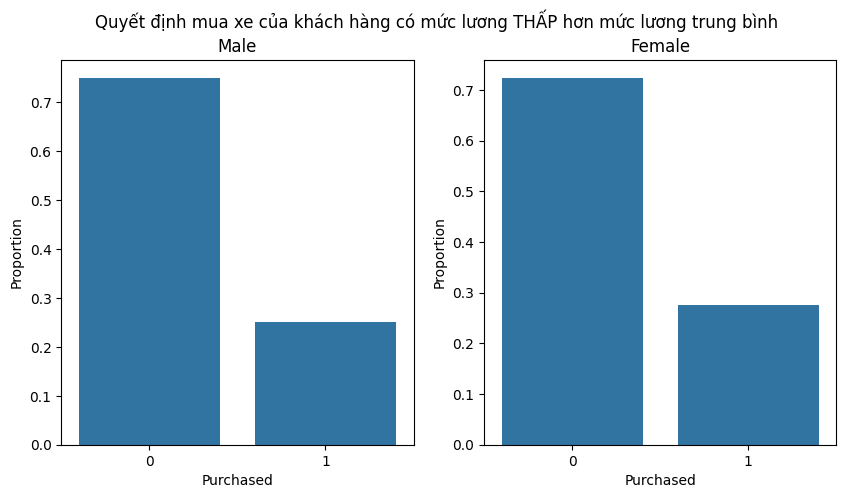

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Quyết định mua xe của khách hàng có mức lương THẤP hơn mức lương trung bình")
sns.barplot(x = list(average_salary_buyers(1, '<').to_dict().keys()), y = list(average_salary_buyers(1, '<').to_dict().values()), ax=ax[0])
ax[0].set_xlabel('Purchased')
ax[0].set_ylabel('Proportion')
ax[0].set_title("Male")

sns.barplot(x = list(average_salary_buyers(0, '<').to_dict().keys()), y = list(average_salary_buyers(0, '<').to_dict().values()), ax= ax[1])
ax[1].set_xlabel('Purchased')
ax[1].set_ylabel('Proportion')
ax[1].set_title("Female")
plt.show()

***Những người có mức lương thấp hơn mức lương trung bình kể cả nam và nữ không muốn mua xe***

*Tạo ra hai biểu đồ cạnh nhau, mỗi biểu đồ biểu diễn tỷ lệ mua và không mua xe của khách hàng có mức lương cao hơn mức lương trung bình, dựa trên giới tính. *

- **Biểu đồ đầu tiên (bên trái)** thể hiện tỷ lệ mua và không mua của nam giới có mức lương trên mức lương trung bình.
- **Biểu đồ thứ hai (bên phải)** thể hiện tỷ lệ mua và không mua của nữ giới có mức lương trên mức lương trung bình.
Để so sánh quyết định mua xe của khách hàng giữa nam và nữ có mức lương thấp hơn mức lương trung bình.

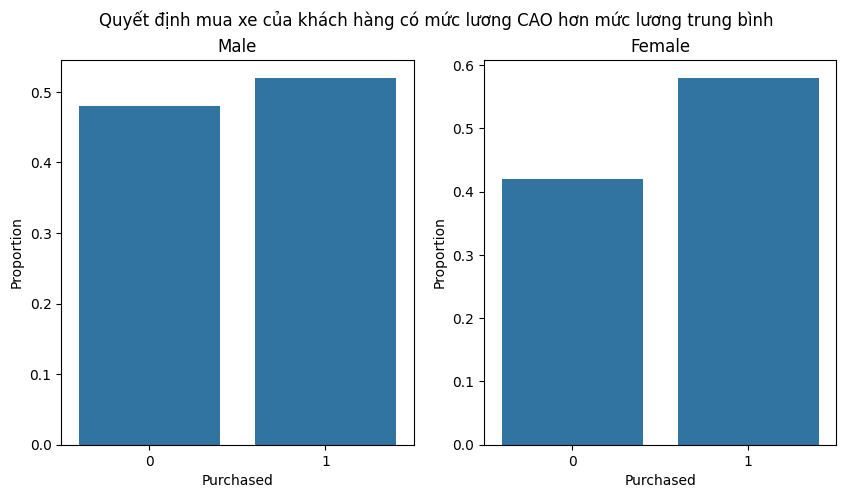

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Quyết định mua xe của khách hàng có mức lương CAO hơn mức lương trung bình")
sns.barplot(x = list(average_salary_buyers(1, '>').to_dict().keys()), y = list(average_salary_buyers(1, '>').to_dict().values()), ax=ax[0])
ax[0].set_xlabel('Purchased')
ax[0].set_ylabel('Proportion')
ax[0].set_title("Male")

sns.barplot(x = list(average_salary_buyers(0, '>').to_dict().keys()), y = list(average_salary_buyers(0, '>').to_dict().values()), ax= ax[1])
ax[1].set_xlabel('Purchased')
ax[1].set_ylabel('Proportion')
ax[1].set_title("Female")
plt.show()

*Về nam giới, quyết định là trung lập và không có quá nhiều chênh lệch mặc dù mức lương của họ lớn hơn mức lương trung bình, Còn đối với nữ, họ có xu hướng mua xe Ô tô khi mức lương của họ lớn hơn mức lương trung bình*

# **CHỌN VÀ XÂY DỰNG MÔ HÌNH**

**SO SÁNH CÁC THUẬT TOÁN PHÂN LỚP**
- **Decision Tree**
- **Logistic Regression**
- **K nearest neighbors**
- **Navie Byes**
- **Random Forest**
- **Perceptron**

In [ ]:
#In ra 10 dòng dữ liệu đầu tiên trong
data.head(10)

,Gender_Enc,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
5,0,47,33500,1
6,0,46,132500,1
7,1,42,64000,0
8,0,30,84500,0
9,1,41,52000,0


 *Tạo ra hai biến **features** và **target** để sử dụng trong việc xây dựng mô hình học máy. Biến features chứa các đặc trưng (features) được sử dụng để dự đoán kết quả, trong trường hợp này là tuổi **(Age)**, mức lương hàng năm **(AnnualSalary)**, và giới tính **(Gender_Enc)**. Biến target chứa nhãn cần dự đoán, ở đây là mua hay không mua (Purchased).*

In [ ]:
# Biến Phụ thuộc features và biến mục tiêu target
feature_cols = ['Age', 'AnnualSalary', 'Gender_Enc']
features = data[feature_cols]
target = data['Purchased']

In [ ]:
features

,Age,AnnualSalary,Gender_Enc
0,35,20000,1
1,40,43500,1
2,49,74000,1
3,40,107500,1
4,25,79000,1
...,...,...,...
995,38,59000,1
996,47,23500,0
997,28,138500,0
998,48,134000,0


In [ ]:
target

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

*Chia dữ liệu thành hai phần: tập huấn luyện (X_train, y_train) và tập kiểm tra (X_test, y_test). Dữ liệu được chia theo tỷ lệ **70-30**, với **70% dùng cho việc huấn luyện** và **30% dùng cho việc kiểm tra** mô hình.*

In [ ]:
#Training Model theo tỉ lệ 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)
print('Train set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)

Train set : (700, 3) (700,)
Test set : (300, 3) (300,)


# **DecisionTree**

*Sử dụng **`DecisionTreeClassifier`** từ **`sklearn.tree`** để khởi tạo một mô hình cây quyết định. Các tham số đã được cấu hình như sau:*

- *`criterion="entropy"`: Sử dụng entropy để đo lường chất lượng của mỗi node.*
- *`random_state=3`: Thiết lập seed cho việc tạo ngẫu nhiên trong quá trình xây dựng cây.*

*Sau khi mô hình được khởi tạo, nó được huấn luyện trên dữ liệu huấn luyện **(`X_train`, `y_train`)** bằng cách sử dụng phương thức `fit()`. Cuối cùng, mô hình cây quyết định được trả về để sử dụng cho việc dự đoán.*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(criterion="entropy", random_state=3)
model_dtree.fit(X_train, y_train)
model_dtree

DecisionTreeClassifier(criterion='entropy', random_state=3)

*Huấn luyện và đánh giá một mô hình Cây Quyết Định (Decision Tree) trên một tập dữ liệu cụ thể. Các bước thực hiện trong đoạn code bao gồm:*

1. **Chia Dữ Liệu**: Dữ liệu được chia thành hai phần, phần huấn luyện (`X_train`, `y_train`) và phần kiểm thử (`X_test`, `y_test`), với tỷ lệ dữ liệu kiểm thử là 30%. Việc phân chia này nhằm đảm bảo rằng mô hình có thể được đánh giá một cách khách quan trên dữ liệu chưa từng được xem trước.

2. **Huấn Luyện Mô Hình Cây Quyết Định**: Mô hình được huấn luyện với tiêu chí là "entropy" để lựa chọn thuộc tính phân tách ở mỗi nút của cây, sử dụng để đo độ lượng thông tin và tìm ra các phân chia tối ưu. Sự lựa chọn này thường hỗ trợ trong việc giảm thiểu độ phức tạp của mô hình và tránh overfitting.

3. **Dự Đoán và Đánh Giá**: Sau khi huấn luyện, mô hình sử dụng tập dữ liệu kiểm thử để dự đoán và các dự đoán này được đánh giá dựa trên độ chính xác. Ma trận nhầm lẫn và báo cáo phân loại cung cấp thông tin chi tiết hơn về hiệu suất của mô hình, bao gồm độ chính xác, recall, và F1-score cho từng lớp.

4. **Trực Quan Hóa Kết Quả**: Ma trận nhầm lẫn được hiển thị dưới dạng heatmap, giúp trực quan hóa cách mô hình phân loại các dự đoán so với giá trị thực tế. Đây là một cách hiệu quả để nhìn thấy mối quan hệ giữa dự đoán và kết quả thực tế, từ đó phát hiện những điểm mạnh và điểm yếu của mô hình.


Accuracy: 0.8933333333333333
Confusion Matrix:
[[160  11]
 [ 21 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       171
           1       0.91      0.84      0.87       129

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



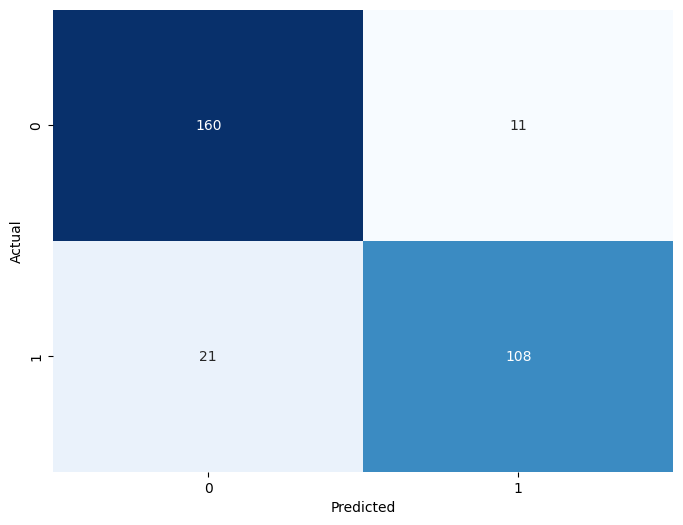

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)
model = DecisionTreeClassifier(criterion="entropy", random_state=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Logistic Regression**

*Mô hình hồi quy logistic được khởi tạo từ LogisticRegression trong sklearn.linear_model. Sau đó, mô hình được huấn luyện trên dữ liệu huấn luyện (X_train, y_train) bằng cách sử dụng phương thức fit().*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

*Thực hiện quá trình huấn luyện và đánh giá một mô hình hồi quy logistic trên một tập dữ liệu cụ thể. Mục đích chính của đoạn code này bao gồm các bước sau:*

1. **Chia Dữ Liệu**: Dữ liệu được chia thành hai phần là dữ liệu huấn luyện (`X_train`, `y_train`) và dữ liệu kiểm thử (`X_test`, `y_test`), với tỷ lệ dữ liệu kiểm thử là 30%. Phân chia này giúp đảm bảo rằng mô hình có thể được đánh giá một cách khách quan khi làm việc với dữ liệu chưa từng được xem trước.

2. **Huấn Luyện Mô Hình Hồi Quy Logistic**: Mô hình hồi quy logistic, một mô hình phân loại tuyến tính, được huấn luyện sử dụng tập dữ liệu huấn luyện. Mô hình này thường được sử dụng trong các bài toán phân loại nhị phân hoặc đa lớp.

3. **Dự Đoán và Đánh Giá**: Sau khi huấn luyện, mô hình sử dụng tập dữ liệu kiểm thử để dự đoán và các dự đoán này được đánh giá dựa trên độ chính xác. Ngoài ra, ma trận nhầm lẫn và báo cáo phân loại cung cấp thông tin chi tiết hơn về hiệu suất của mô hình, bao gồm độ chính xác, recall, và F1-score cho từng lớp.

4. **Trực Quan Hóa Kết Quả**: Ma trận nhầm lẫn được hiển thị dưới dạng heatmap, giúp trực quan hóa số lượng dự đoán đúng và sai của mô hình so với giá trị thực tế. Điều này cho phép người xem dễ dàng nhận thấy các điểm mạnh và điểm yếu của mô hình trong việc phân loại các lớp cụ thể.


Accuracy: 0.5766666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       171
           1       1.00      0.02      0.03       129

    accuracy                           0.58       300
   macro avg       0.79      0.51      0.38       300
weighted avg       0.76      0.58      0.43       300



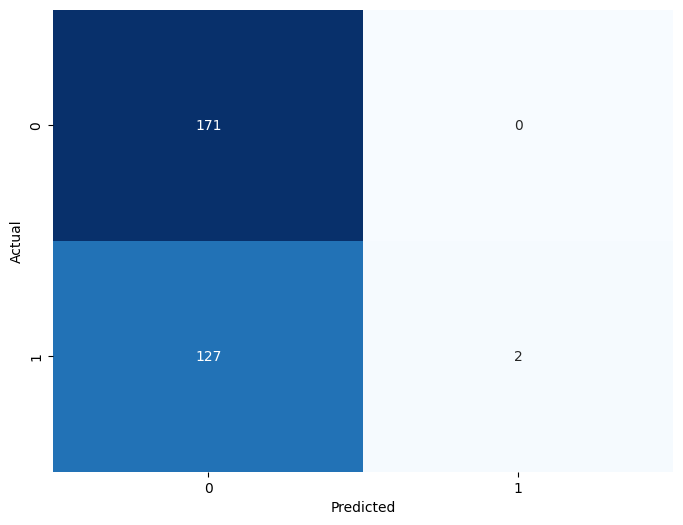

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **KNN**

*Huấn luyện và đánh giá một mô hình K-Nearest Neighbors (KNN) với \( K = 3 \) người hàng xóm trên một tập dữ liệu cụ thể. Các bước chi tiết trong đoạn code này bao gồm:*

1. **Chia Dữ Liệu**: Dữ liệu được chia thành hai phần, phần huấn luyện (`X_train`, `y_train`) và phần kiểm thử (`X_test`, `y_test`), với tỷ lệ dữ liệu kiểm thử là 30% tổng số dữ liệu. Phương pháp phân chia này giúp đảm bảo tính khách quan khi đánh giá hiệu suất của mô hình trên dữ liệu mới.

2. **Huấn Luyện Mô Hình KNN**: Mô hình K-Nearest Neighbors được huấn luyện sử dụng tập dữ liệu huấn luyện. KNN là một thuật toán phân loại dựa trên khoảng cách, nơi quyết định của một điểm dữ liệu mới được dựa trên đa số láng giềng gần nhất của nó.

3. **Dự Đoán và Đánh Giá**: Sau khi huấn luyện, mô hình sử dụng tập dữ liệu kiểm thử để dự đoán và các dự đoán này được đánh giá dựa trên độ chính xác. Ma trận nhầm lẫn và báo cáo phân loại cung cấp cái nhìn chi tiết về hiệu suất của mô hình, bao gồm các chỉ số như độ chính xác, recall, và F1-score cho từng lớp.

4. **Trực Quan Hóa Kết Quả**: Ma trận nhầm lẫn được trình bày dưới dạng heatmap, giúp trực quan hóa cách mô hình phân loại các dự đoán so với giá trị thực tế. Sử dụng heatmap là phương pháp hiệu quả để hiển thị mối quan hệ giữa các lớp dự đoán và thực tế, làm nổi bật điểm mạnh và cần cải thiện của mô hình.


Accuracy: 0.8133333333333334
Confusion Matrix:
[[148  23]
 [ 33  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       171
           1       0.81      0.74      0.77       129

    accuracy                           0.81       300
   macro avg       0.81      0.80      0.81       300
weighted avg       0.81      0.81      0.81       300



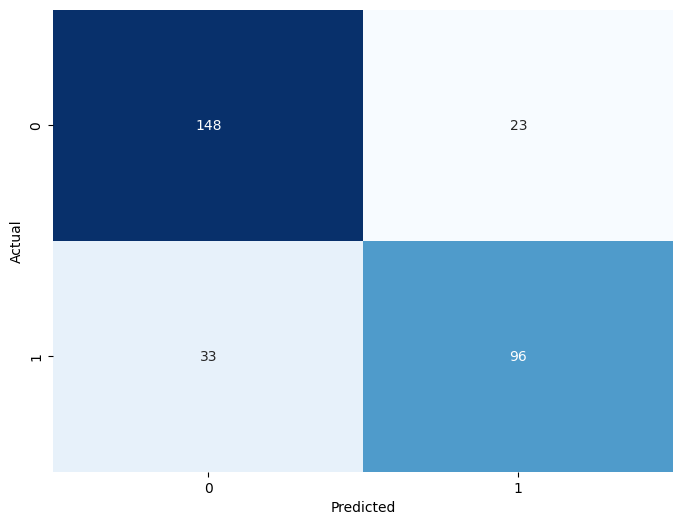

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)
# Khởi tạo và huấn luyện mô hình KNN với K=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*Huấn luyện và đánh giá một mô hình K-Nearest Neighbors (KNN) với \( K = 5 \) người hàng xóm trên một tập dữ liệu cụ thể. Các bước chi tiết trong đoạn code này bao gồm:*

1. **Chia Dữ Liệu**: Dữ liệu được chia thành hai phần, phần huấn luyện (`X_train`, `y_train`) và phần kiểm thử (`X_test`, `y_test`), với tỷ lệ dữ liệu kiểm thử là 30% tổng số dữ liệu. Phương pháp phân chia này giúp đảm bảo tính khách quan khi đánh giá hiệu suất của mô hình trên dữ liệu mới.

2. **Huấn Luyện Mô Hình KNN**: Mô hình K-Nearest Neighbors được huấn luyện sử dụng tập dữ liệu huấn luyện. KNN là một thuật toán phân loại dựa trên khoảng cách, nơi quyết định của một điểm dữ liệu mới được dựa trên đa số láng giềng gần nhất của nó.

3. **Dự Đoán và Đánh Giá**: Sau khi huấn luyện, mô hình sử dụng tập dữ liệu kiểm thử để dự đoán và các dự đoán này được đánh giá dựa trên độ chính xác. Ma trận nhầm lẫn và báo cáo phân loại cung cấp cái nhìn chi tiết về hiệu suất của mô hình, bao gồm các chỉ số như độ chính xác, recall, và F1-score cho từng lớp.

4. **Trực Quan Hóa Kết Quả**: Ma trận nhầm lẫn được trình bày dưới dạng heatmap, giúp trực quan hóa cách mô hình phân loại các dự đoán so với giá trị thực tế. Sử dụng heatmap là phương pháp hiệu quả để hiển thị mối quan hệ giữa các lớp dự đoán và thực tế, làm nổi bật điểm mạnh và cần cải thiện của mô hình.


Accuracy: 0.8266666666666667
Confusion Matrix:
[[150  21]
 [ 31  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       171
           1       0.82      0.76      0.79       129

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300



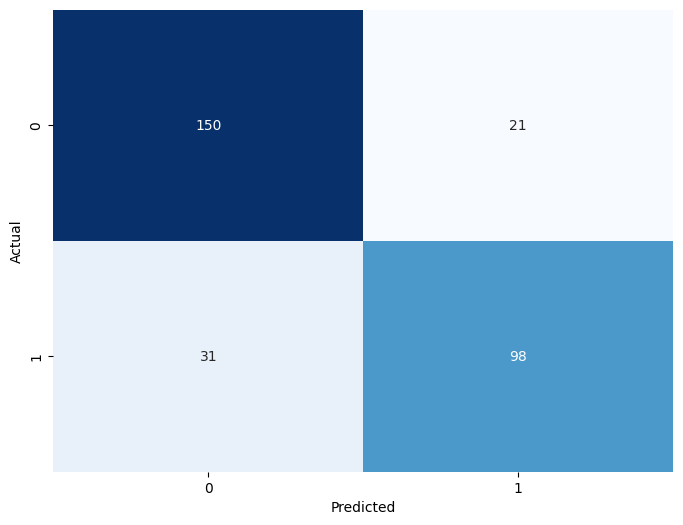

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)
# Khởi tạo và huấn luyện mô hình KNN với K=5
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Navie Bayes**

*Huấn luyện và đánh giá một mô hình phân loại sử dụng thuật toán Naive Bayes Gaussian trên một tập dữ liệu cụ thể. Các bước trong đoạn code bao gồm:*

1. **Chia Dữ Liệu**: Dữ liệu được chia thành hai phần, phần huấn luyện (`X_train`, `y_train`) và phần kiểm thử (`X_test`, `y_test`), với tỷ lệ dữ liệu kiểm thử là 30% tổng số dữ liệu. Việc phân chia này giúp đảm bảo khả năng đánh giá khách quan về hiệu suất của mô hình khi làm việc với dữ liệu chưa được xem trước.

2. **Huấn Luyện Mô Hình**: Mô hình Naive Bayes, cụ thể là phiên bản Gaussian, được huấn luyện sử dụng tập dữ liệu huấn luyện. Naive Bayes là một mô hình phân loại dựa trên xác suất, thường hiệu quả trong các bài toán có dữ liệu rõ ràng và khi mối quan hệ giữa các đặc trưng là độc lập với nhau.

3. **Dự Đoán và Đánh Giá**: Sau khi huấn luyện, mô hình sử dụng tập dữ liệu kiểm thử để dự đoán và độ chính xác của các dự đoán được tính toán. Ma trận nhầm lẫn và báo cáo phân loại cung cấp cái nhìn tổng quát về hiệu suất của mô hình, bao gồm các chỉ số như độ chính xác, recall, và F1-score cho từng lớp.

4. **Trực Quan Hóa Kết Quả**: Ma trận nhầm lẫn được trực quan hóa dưới dạng heatmap, giúp người xem dễ dàng nhận biết số lượng dự đoán đúng và sai của mô hình so với giá trị thực tế. Việc sử dụng heatmap là một phương pháp hiệu quả để hiển thị dữ liệu phức tạp một cách trực quan, làm nổi bật những khu vực mà mô hình hoạt động tốt và những phần cần được cải thiện.



Accuracy: 0.8666666666666667
Confusion Matrix:
[[159  12]
 [ 28 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       171
           1       0.89      0.78      0.83       129

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



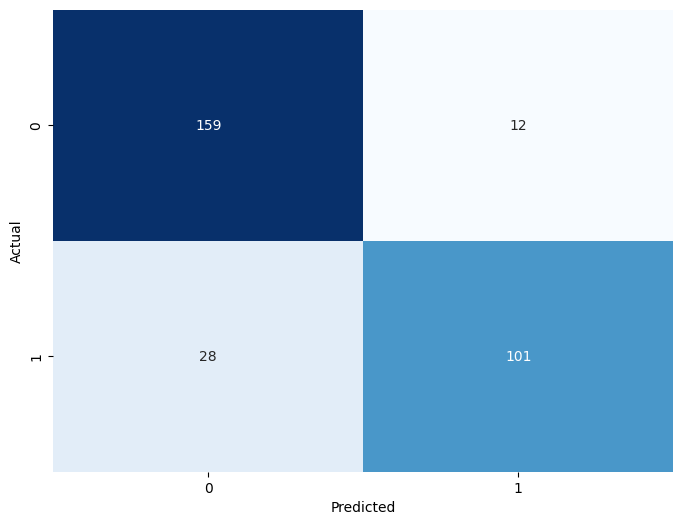

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Random Forest**

*Thực hiện quá trình huấn luyện và đánh giá một mô hình phân loại bằng cách sử dụng thuật toán (Random Forest). Các bước chi tiết được thực hiện như sau:*

1. **Chia Dữ Liệu**: Dữ liệu được chia thành hai phần, phần huấn luyện (`X_train`, `y_train`) và phần kiểm thử (`X_test`, `y_test`), với tỷ lệ dữ liệu kiểm thử là 30% tổng số dữ liệu. Việc phân chia này giúp kiểm tra khả năng tổng quát hóa của mô hình trên dữ liệu mới.

2. **Huấn Luyện Mô Hình**:Random Forest là một thuật toán phân loại mạnh mẽ, giảm thiểu hiện tượng overfitting thông qua việc kết hợp nhiều cây quyết định.

3. **Dự Đoán và Đánh Giá**: Sau khi huấn luyện, mô hình sử dụng tập dữ liệu kiểm thử để dự đoán, và các dự đoán này sau đó được đánh giá dựa trên các chỉ số như độ chính xác. Ngoài ra, ma trận nhầm lẫn và báo cáo phân loại cung cấp thông tin chi tiết hơn về hiệu suất của mô hình, bao gồm precision, recall và F1-score cho từng lớp.

4. **Trực Quan Hóa Kết Quả**: Ma trận nhầm lẫn được hiển thị dưới dạng heatmap, giúp trực quan hóa mức độ chính xác của các dự đoán so với nhãn thực tế. Heatmap này giúp người dùng dễ dàng nhận thấy các trường hợp mà mô hình dự đoán chính xác hoặc sai lệch, từ đó đánh giá các điểm mạnh và điểm yếu của mô hình trong các tình huống cụ thể.

Accuracy: 0.9066666666666666
Confusion Matrix:
[[162   9]
 [ 19 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       171
           1       0.92      0.85      0.89       129

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



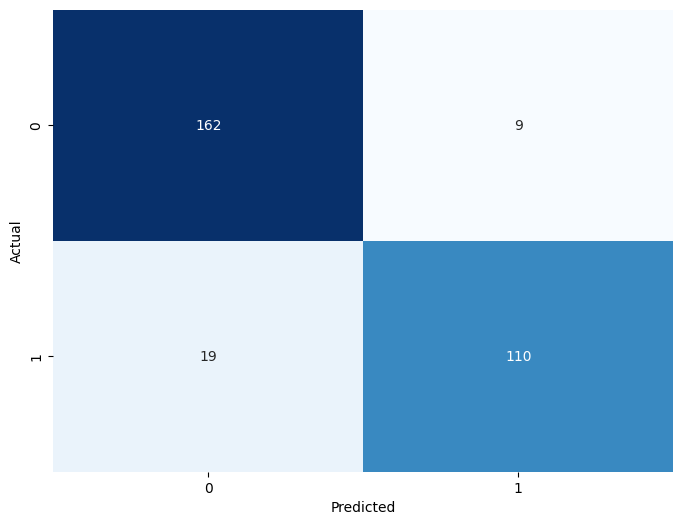

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)
model_Rdfr = RandomForestClassifier(n_estimators=100, random_state=42)
model_Rdfr.fit(X_train, y_train)
y_pred = model_Rdfr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Perceptron**

*Mục đích chính là để huấn luyện một mô hình Perceptron, đánh giá hiệu suất của nó và trực quan hóa kết quả trên tập dữ liệu đã cho. Cụ thể hơn, các bước trong đoạn code này bao gồm:*

1. **Chia Dữ Liệu**: Dữ liệu được chia thành hai phần, phần huấn luyện (`X_train`, `y_train`) và phần kiểm thử (`X_test`, `y_test`), với tỷ lệ dữ liệu kiểm thử là 30% của tổng số dữ liệu. Việc chia dữ liệu giúp đảm bảo rằng mô hình có thể được đánh giá một cách khách quan, không bị ảnh hưởng bởi các dữ liệu đã dùng trong quá trình huấn luyện.

2. **Huấn Luyện Mô Hình**: Mô hình Perceptron được huấn luyện sử dụng dữ liệu huấn luyện. Perceptron là một loại mô hình phân loại tuyến tính đơn giản và thường được sử dụng như một điểm khởi đầu trong các bài toán phân loại.

3. **Dự Đoán và Đánh Giá**: Mô hình dùng dữ liệu kiểm thử để dự đoán và các dự đoán này sau đó được so sánh với nhãn thực tế để tính toán độ chính xác. Ngoài ra, ma trận nhầm lẫn (confusion matrix) và báo cáo phân loại (classification report) cung cấp cái nhìn chi tiết hơn về hiệu suất của mô hình, bao gồm độ nhạy, độ đặc hiệu, và các chỉ số khác như F1-score.

4. **Trực Quan Hóa Kết Quả**: Ma trận nhầm lẫn được trực quan hóa dưới dạng heatmap sử dụng thư viện Seaborn, giúp hiển thị rõ ràng các trường hợp mà mô hình dự đoán chính xác hoặc sai lệch so với giá trị thực tế. Điều này hỗ trợ trong việc phân tích sâu hơn về cách mô hình hoạt động và phát hiện ra những khu vực mà mô hình cần được cải thiện.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.43
Confusion Matrix:
[[  0 171]
 [  0 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.43      1.00      0.60       129

    accuracy                           0.43       300
   macro avg       0.21      0.50      0.30       300
weighted avg       0.18      0.43      0.26       300



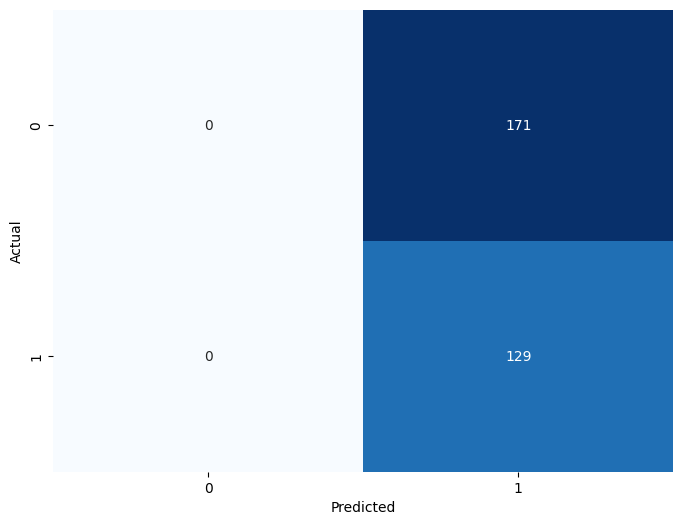

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)
model = Perceptron()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **So sánh Kết quả các Thuật toán**


1.   **Decision Tree**
2.   **Logistic Regression**

1.   **K nearest neighbors**
2.   **Navie Byes**

1.   **Random Forest**
2.  **Perceptron**













 *Tạo một DataFrame từ danh sách các bản ghi, mỗi bản ghi chứa các chỉ số hiệu suất cho các mô hình máy học khác nhau. DataFrame df được cấu trúc với các cột sau: 'Model', 'accuracy', 'recall', và 'f1_score'. Mỗi hàng trong DataFrame đại diện cho một mô hình khác nhau và bao gồm tên mô hình cùng với các điểm số hiệu suất tương ứng cho độ chính xác, recall và điểm F1.*

*Mục đích của việc tạo ra DataFrame như vậy có thể là:*

**So Sánh Các Mô Hình:** *DataFrame này cho phép so sánh dễ dàng các mô hình máy học khác nhau dựa trên các chỉ số hiệu suất của chúng. Bạn có thể nhanh chóng xem mô hình nào có độ chính xác, recall, hoặc điểm F1 cao nhất.*

**Trực Quan Hóa Dữ Liệu:** *Bạn có thể muốn trực quan hóa dữ liệu này để làm cho các so sánh trở nên trực quan hơn, sử dụng các biểu đồ như biểu đồ cột hoặc biểu đồ đường.*

**Báo Cáo Kết Quả:** *Định dạng này hữu ích để báo cáo kết quả một cách có cấu trúc và dễ đọc, có thể có lợi trong các bài báo học thuật, báo cáo kỹ thuật, hoặc bài thuyết trình.*

In [ ]:
import pandas as pd
records = [('Decision Tree', 0.89, 0.84, 0.87),
           ('Logistic Regresstion', 0.58, 0.02, 0.03),
           ('K Nearnest Neighbor', 0.83, 0.76, 0.79),
           ('Naive Bayes', 0.87, 0.78, 0.83),
           ('Random Forest', 0.91, 0.85, 0.89),
           ('Perceptron', 0.43, 1.00, 0.60)]
df = pd.DataFrame(data = records, columns = ['Model', 'accuracy', 'recall', 'f1_score'])
df

,Model,accuracy,recall,f1_score
0,Decision Tree,0.89,0.84,0.87
1,Logistic Regresstion,0.58,0.02,0.03
2,K Nearnest Neighbor,0.83,0.76,0.79
3,Naive Bayes,0.87,0.78,0.83
4,Random Forest,0.91,0.85,0.89
5,Perceptron,0.43,1.00,0.60



*Mục đích của việc tạo ra `df2` như vậy có thể là để chuẩn bị dữ liệu cho việc trực quan hóa hoặc phân tích thống kê sâu hơn, ví dụ như để so sánh hiệu suất của các mô hình trên các chỉ số khác nhau bằng biểu đồ hoặc để tiến hành các kiểm định thống kê về hiệu suất của mô hình. Điều này giúp dễ dàng nhìn nhận và so sánh trực tiếp hiệu suất của từng mô hình trên các chỉ số khác nhau từ cùng một biểu đồ hoặc báo cáo.*

In [ ]:
import pandas as pd
col = list(df['accuracy']) + list(df['recall']) + list(df['f1_score'])
stats = ['accuracy', 'accuracy', 'accuracy', 'accuracy', 'accuracy', 'accuracy',
         'recall', 'recall', 'recall', 'recall', 'recall', 'recall',
         'f1_score', 'f1_score', 'f1_score', 'f1_score', 'f1_score', 'f1_score']
stats = stats[:len(col)]
df2 = pd.DataFrame()
df2['score'] = col
df2['algo'] = list(df['Model']) * 3
df2['stats'] = stats

*Việc sử dụng biểu đồ cột giúp người xem dễ dàng so sánh hiệu suất của các mô hình khác nhau trên từng chỉ số đánh giá cụ thể. Mỗi mô hình có ba cột tương ứng với ba chỉ số hiệu suất, cho phép người xem nhanh chóng nhận ra mô hình nào hoạt động tốt nhất hoặc kém nhất trên từng tiêu chí cụ thể. Đây là một cách hiệu quả để trình bày dữ liệu phức tạp một cách trực quan, làm nổi bật sự khác biệt giữa các mô hình và giữa các chỉ số đánh giá.*

<ipython-input-103-fd1c12403ba4>:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=df2, x='algo', y='score', hue='stats', palette=custom_palette)


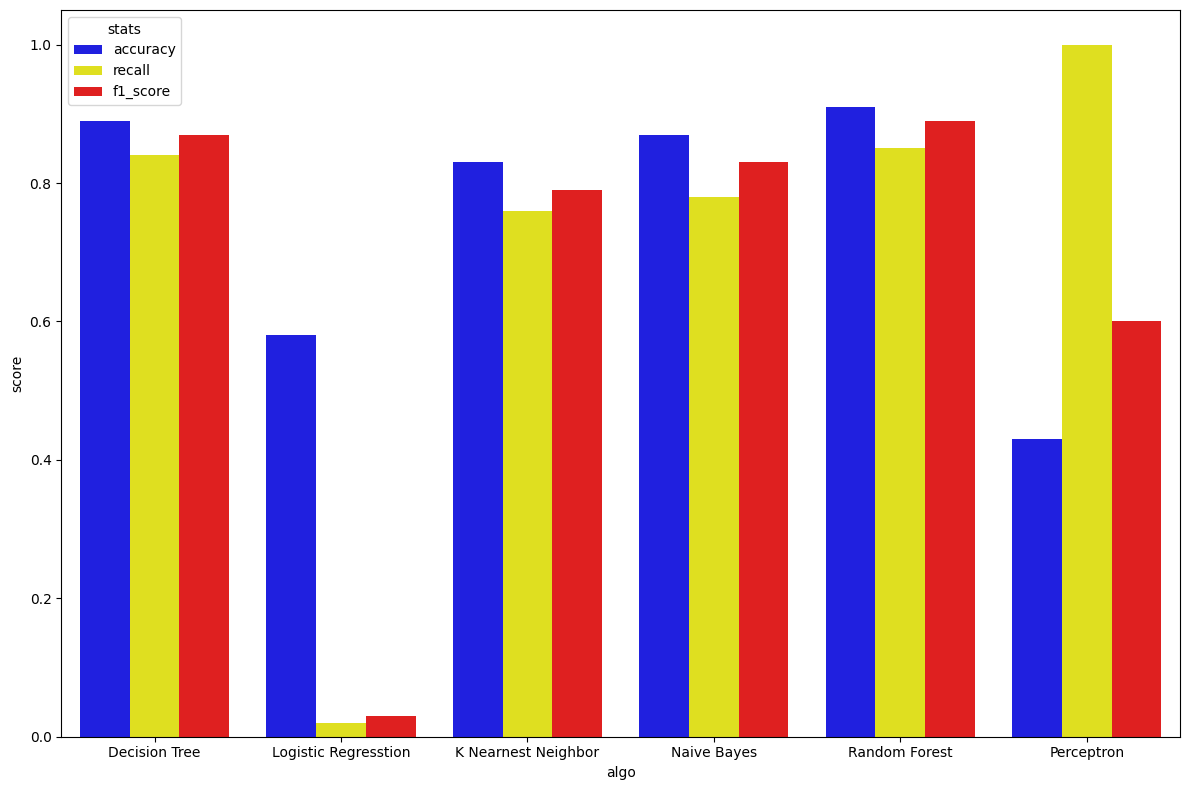

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = ["blue", "yellow", "red", "purple"]
fig = plt.figure(figsize=(12, 8))
sns.barplot(data=df2, x='algo', y='score', hue='stats', palette=custom_palette)
plt.tight_layout()
plt.show()

- *Với mục tiêu ưu tiên tìm ra thuật toán tốt nhất cho mô hình , nhóm đã sử dụng 6 thuật toán phân lớp để xây dựng mô hình, mỗi mô hình cho ra mỗi kết quả khác nhau. Để chọn ra mô hình phù hợp nhất, nhóm sẽ dùng 3 chỉ số accuracy, recall và f1-score để đánh giá*
- *Trên đây là biểu đồ thể hiện 3 chỉ số ở mỗi mô hình*

-	***Ta nhận thấy:***
- **Random Forest:**
  + **Độ chính xác (Accuracy):** Cao nhất, khoảng 0.91, cho thấy mô hình này đúng đắn trong phần lớn các dự đoán.
  + **Recall**: Cao, chỉ thấp hơn một chút so với Perceptron, cho thấy khả năng phát hiện lớp quan tâm tốt.
  + **F1-score:** Cao nhất, cho thấy sự cân bằng tốt giữa precision và recall, đặc biệt quan trọng khi các lớp có sự mất cân đối.
- **Decision Tree:**
  Có hiệu suất khá tốt nhưng thấp hơn so với Random Forest. Điều này cho thấy mô hình khá cân bằng nhưng có thể không đủ mạnh so với Random Forest.
- **Naive Bayes:**
  Hiệu suất tổng thể ổn định nhưng không phải là tốt nhất trong bất kỳ chỉ số nào. Điều này cho thấy mô hình có khả năng dự đoán đáng tin cậy nhưng không phải là lựa chọn hàng đầu.
- **K Nearest Neighbor:**
  Điểm số tốt nhưng không vượt trội. Có thể phù hợp với các bài toán cần mô hình đơn giản và dễ giải thích.
- **Logistic Regression:**
  Có hiệu suất thấp trong cả độ chính xác và F1-score, có thể không phải là lựa chọn tốt nhất cho tập dữ liệu này.
- **Perceptron:**
  Mặc dù có recall cao, nhưng độ chính xác và F1-score thấp cho thấy mô hình này có thể phân loại không chính xác đối với lớp quan tâm.


***Đánh giá tổng thể:***

* **Random Forest** nổi bật là mô hình có hiệu suất tổng thể tốt nhất, có thể là lựa chọn tốt nhất cho bài toán phân loại nếu bạn cần một mô hình mạnh mẽ và cân bằng.*
* **Decision Tree** có thể được xem xét nếu bạn cần một mô hình đơn giản và dễ giải thích. Mặc dù không mạnh như Random Forest, nhưng nó cung cấp một cân bằng tốt giữa hiệu suất và tính minh bạch.*
* **Các mô hình khác** có thể hữu ích cho những tình huống cụ thể, tuy nhiên, dựa trên ba chỉ số được đánh giá, chúng không phải là lựa chọn tốt nhất cho tập dữ liệu này.*
* **Perceptron và Logistic Regression** có vẻ không phù hợp với tập dữ liệu này dựa trên hiệu suất tổng thể.*

# **So sánh kết quả và chọn thuật toán để dự báo**

***-	Rút ra kết luận:***

***Chọn Mô Hình Tốt Nhất:***

*Dựa trên biểu đồ, Random Forest có vẻ là lựa chọn tốt nhất bởi nó đạt điểm cao nhất ở cả ba chỉ số đánh giá, cho thấy sự cân bằng giữa độ chính xác và khả năng tái tạo kết quả.*
*Mô hình Decision Tree cũng là một lựa chọn mạnh mẽ khác với hiệu suất ổn định trên tất cả các chỉ số.*

*Tải và cài đặt gói pydotplus , thường được sử dụng để trực quan hóa các cây quyết định từ sklearn*

In [ ]:
%pip install pydotplus

*Thiết lập môi trường và các công cụ cần thiết cho việc trực quan hóa cây quyết định. Mô hình cây quyết định có thể được huấn luyện sử dụng sklearn.tree.DecisionTreeClassifier hoặc DecisionTreeRegressor và sau đó được biểu diễn dưới dạng đồ thị*

In [ ]:
import matplotlib.pyplot as plt
from six import StringIO
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
%matplotlib inline

*Trực quan hóa cách cây quyết định phân loại dữ liệu. Việc này giúp hiểu rõ hơn cách mô hình đưa ra quyết định dựa trên các thuộc tính đầu vào và cách các quyết định đó được dẫn dắt thông qua cây quyết định. Trực quan hóa cũng giúp kiểm tra trực giác và hiểu biết về dữ liệu, và có thể là một công cụ hữu ích cho việc trình bày và giải thích mô hình.*

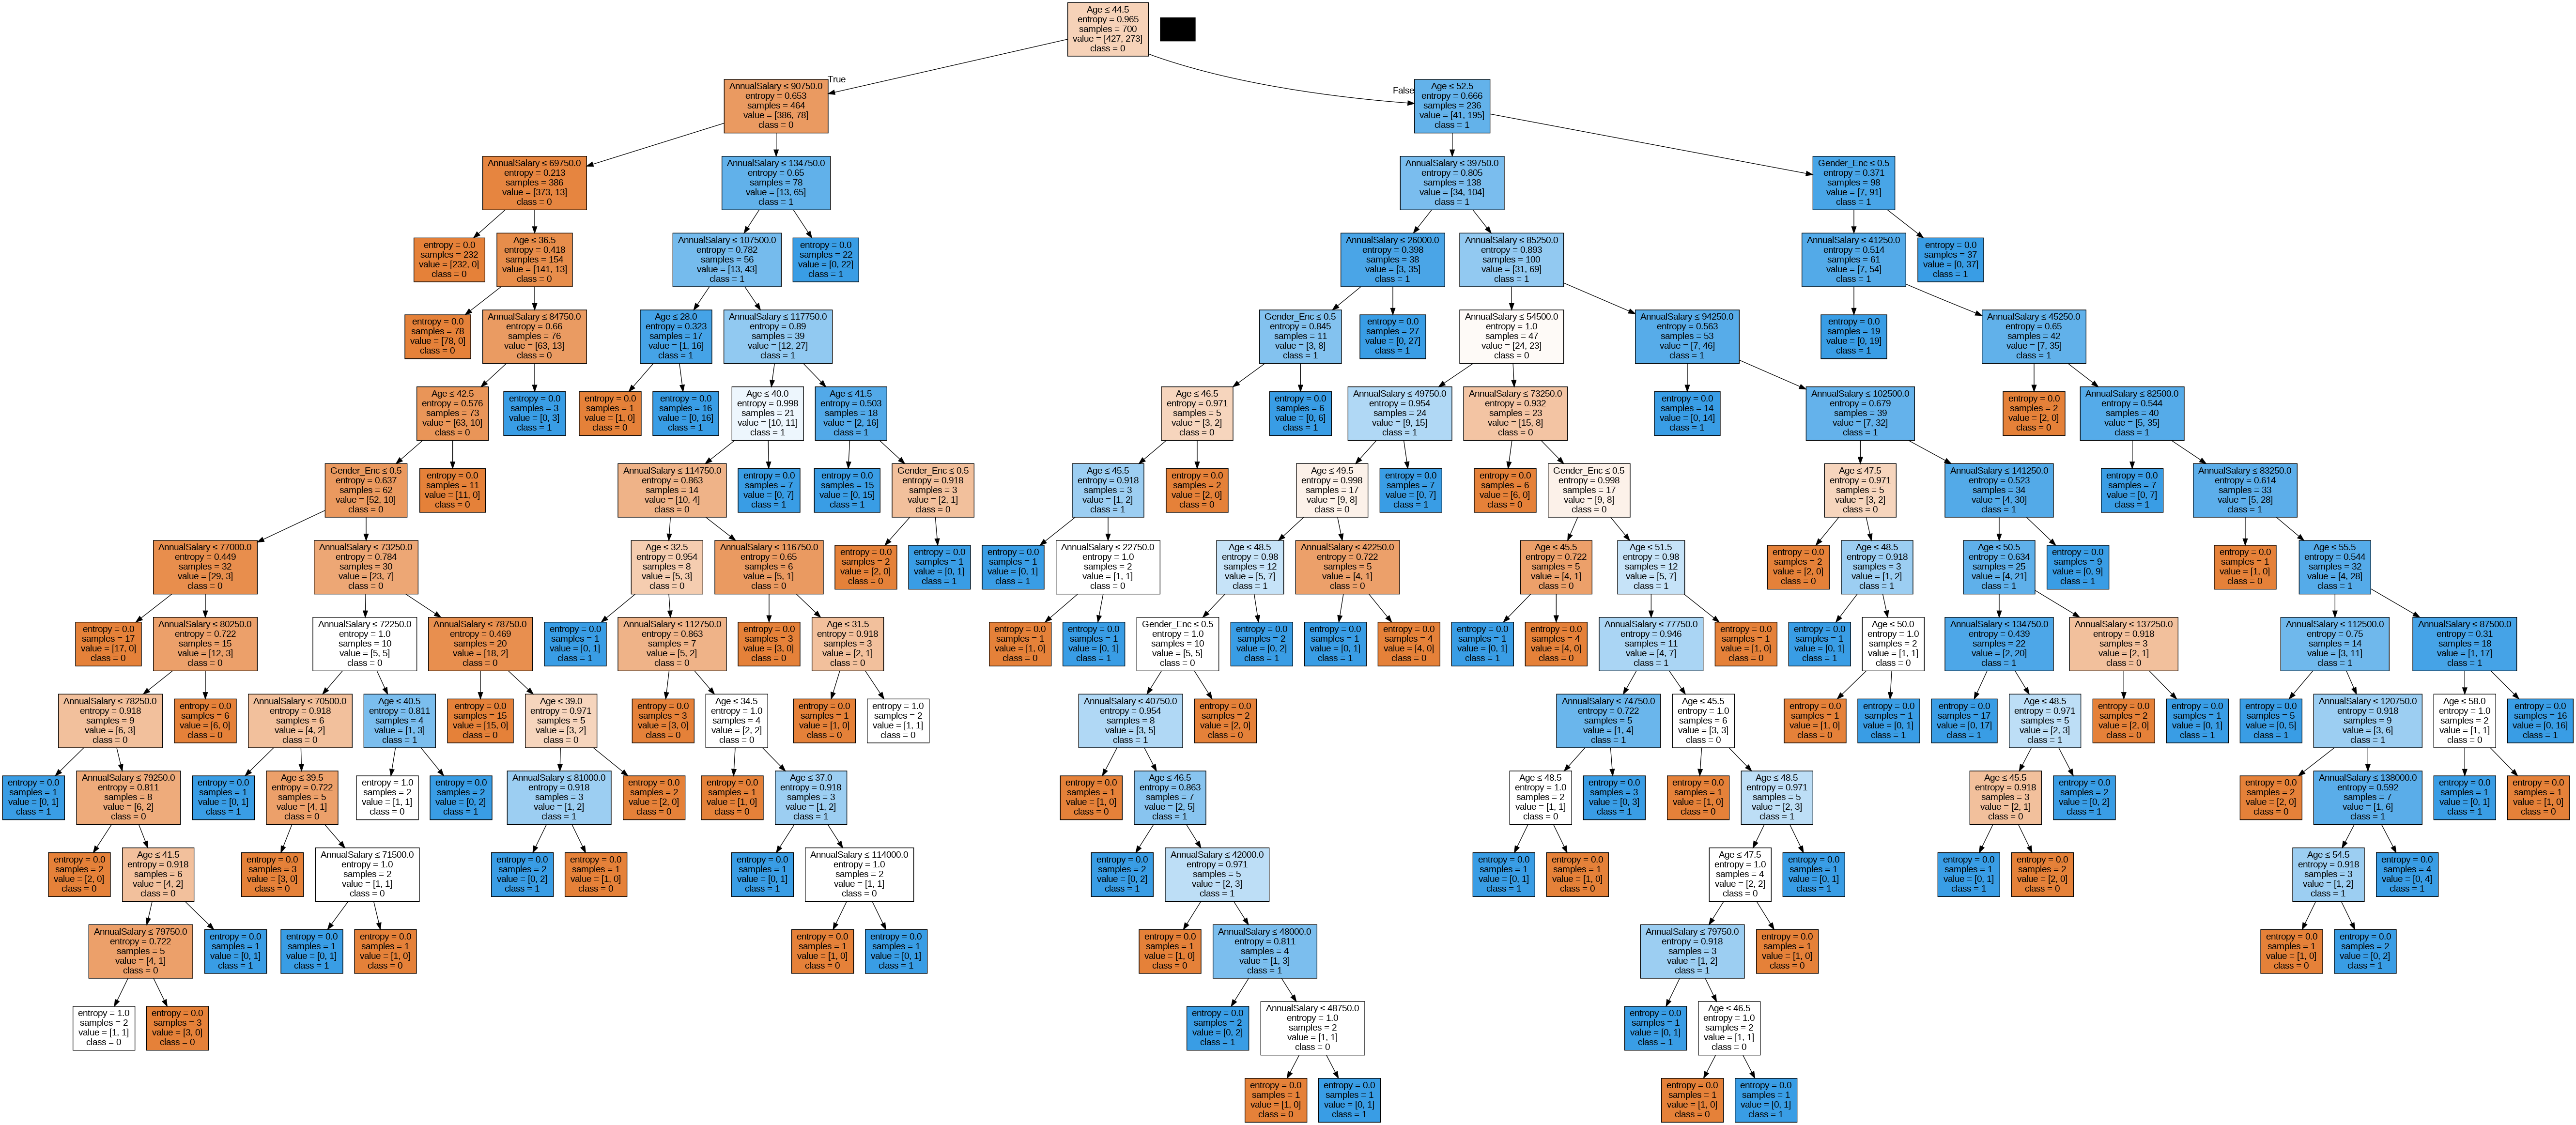

In [ ]:
dot_data = StringIO()
filename = 'churn_tree.png'
targetName = data['Purchased'].unique().tolist()
out = tree.export_graphviz(model_dtree, feature_names=feature_cols, out_file=dot_data, class_names=np.unique(y_train).astype('str').tolist(), filled=True,special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
Image(graph.create_png())

*In ra biểu diễn dạng văn bản của mô hình cây quyết định model_dtree.
Mục đích của việc này là để cung cấp một cách nhìn trực quan và dễ hiểu về cấu trúc và quyết định của cây quyết định mà không cần đến đồ họa.*

In [ ]:
print(tree.export_text(model_dtree, feature_names=feature_cols))

|--- Age <= 44.50
|   |--- AnnualSalary <= 90750.00
|   |   |--- AnnualSalary <= 69750.00
|   |   |   |--- class: 0
|   |   |--- AnnualSalary >  69750.00
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- AnnualSalary <= 84750.00
|   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |--- Gender_Enc <= 0.50
|   |   |   |   |   |   |   |--- AnnualSalary <= 77000.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- AnnualSalary >  77000.00
|   |   |   |   |   |   |   |   |--- AnnualSalary <= 80250.00
|   |   |   |   |   |   |   |   |   |--- AnnualSalary <= 78250.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- AnnualSalary >  78250.00
|   |   |   |   |   |   |   |   |   |   |--- AnnualSalary <= 79250.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- AnnualSalary >  79250.00
|   |   |   |   

# TEST Dữ liệu mới với thuật toán DecisionTree

*Dự đoán hành vi của một khách hàng mới dựa trên một mô hình cây quyết định (model_dtree) đã được huấn luyện trước đó. Dữ liệu mới (new_data) bao gồm các đặc trưng về tuổi, lương hàng năm, và mã hóa giới tính (giả sử 1 là Nam và 0 là Nữ).*

In [ ]:
# Dữ liệu mới cần dự đoán
new_data = [[34, 99000, 1]]
predicted_label = model_dtree.predict(new_data)
feature_names = ['Age', 'AnnualSalary', 'Gender_Enc']
predicted_label_text = "Khách hàng quyết định Mua xe ô tô" if predicted_label == 1 else "Khách hàng Không mua xe ô tô"
print("Thông tin khách hàng:")
print("- Tuổi:", new_data[0][0])
print("- Lương:", new_data[0][1])
print("- Giới tính:", "Nam" if new_data[0][2] == 1 else "Nữ")
print("Mô hình Dự đoán:", predicted_label_text)

Thông tin khách hàng:
- Tuổi: 34
- Lương: 99000
- Giới tính: Nam
Mô hình Dự đoán: Khách hàng quyết định Mua xe ô tô


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Dữ liệu mới cần dự đoán
new_data = [[25, 125000, 0]]
predicted_label = model_dtree.predict(new_data)
feature_names = ['Age', 'AnnualSalary', 'Gender_Enc']
predicted_label_text = "Khách hàng quyết định Mua xe ô tô" if predicted_label == 1 else "Khách hàng Không mua xe ô tô"
print("Thông tin khách hàng:")
print("- Tuổi:", new_data[0][0])
print("- Lương:", new_data[0][1])
print("- Giới tính:", "Nam" if new_data[0][2] == 1 else "Nữ")
print("Mô hình Dự đoán:", predicted_label_text)

Thông tin khách hàng:
- Tuổi: 25
- Lương: 125000
- Giới tính: Nữ
Mô hình Dự đoán: Khách hàng quyết định Mua xe ô tô


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Dữ liệu mới cần dự đoán
new_data = [[18, 80000, 0]]
predicted_label = model_dtree.predict(new_data)
feature_names = ['Age', 'AnnualSalary', 'Gender_Enc']
predicted_label_text = "Khách hàng quyết định Mua xe ô tô" if predicted_label == 1 else "Khách hàng Không mua xe ô tô"
print("Thông tin khách hàng:")
print("- Tuổi:", new_data[0][0])
print("- Lương:", new_data[0][1])
print("- Giới tính:", "Nam" if new_data[0][2] == 1 else "Nữ")
print("Mô hình Dự đoán:", predicted_label_text)

Thông tin khách hàng:
- Tuổi: 18
- Lương: 80000
- Giới tính: Nữ
Mô hình Dự đoán: Khách hàng Không mua xe ô tô


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# TEST Dữ liệu mới với thuật toán Random Forest

*Dự đoán sử dụng mô hình Random Forest (model_Rdfr) để xác định liệu một khách hàng mới, với các thông tin cụ thể về tuổi, lương hàng năm và giới tính, có quyết định mua xe ô tô hay không. Sau đó, nó in ra thông tin chi tiết của khách hàng đó và dự đoán của mô hình*

In [ ]:
# Dữ liệu mới cần dự đoán
new_data = np.array([[18, 80000, 0]])  # Ví dụ với một mẫu dữ liệu mới, tuổi: 18, lương: 80000, giới tính: 0 (nữ)
predicted_label = model_Rdfr.predict(new_data)
feature_names = ['Age', 'AnnualSalary', 'Gender_Enc']
predicted_label_text = "Khách hàng quyết định Mua xe ô tô" if predicted_label == 1 else "Khách hàng Không mua xe ô tô"
print("Thông tin khách hàng:")
print("- Tuổi:", new_data[0][0])
print("- Lương:", new_data[0][1])
print("- Giới tính:", "Nam" if new_data[0][2] == 1 else "Nữ")
print("Mô hình Dự đoán:", predicted_label_text)

Thông tin khách hàng:
- Tuổi: 18
- Lương: 80000
- Giới tính: Nữ
Mô hình Dự đoán: Khách hàng Không mua xe ô tô


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Dữ liệu mới cần dự đoán
new_data = np.array([[34, 99000, 1]])
predicted_label = model_Rdfr.predict(new_data)
feature_names = ['Age', 'AnnualSalary', 'Gender_Enc']
predicted_label_text = "Khách hàng quyết định Mua xe ô tô" if predicted_label == 1 else "Khách hàng Không mua xe ô tô"
print("Thông tin khách hàng:")
print("- Tuổi:", new_data[0][0])
print("- Lương:", new_data[0][1])
print("- Giới tính:", "Nam" if new_data[0][2] == 1 else "Nữ")
print("Mô hình Dự đoán:", predicted_label_text)

Thông tin khách hàng:
- Tuổi: 34
- Lương: 99000
- Giới tính: Nam
Mô hình Dự đoán: Khách hàng quyết định Mua xe ô tô


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
